In [1]:
#module imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#SKLEARN
from sklearn.model_selection import train_test_split

#
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
filepath = "./Nat_Gas.csv"
data = pd.read_csv(filepath)
print ('shape of data: ',data.shape)
data.head()

shape of data:  (48, 2)


,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


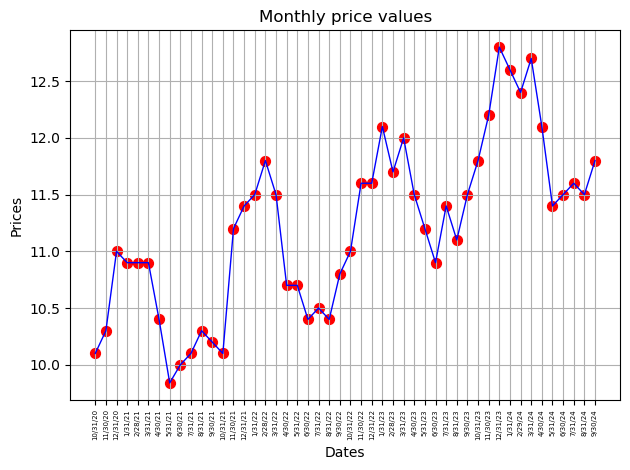

In [5]:
#plotting
headers = data.columns.tolist()

#plotting
#ax=data.plot(x=headers[0], y=[headers[1]], kind='line', title='Monthly price values')

ax=plt.plot(data[headers[0]], data[headers[1]], color='blue', linestyle='-', linewidth=1)
ax=plt.scatter(data[headers[0]], data[headers[1]], color='red', marker='o', s=50)

plt.xlabel('Dates')
plt.ylabel('Prices')
plt.title('Monthly price values')
plt.xticks(size=5, rotation=90)
plt.tight_layout()
plt.grid(True)
plt.show()

In [7]:
#Convert the date column to datetime and  Replace 'Dates' with the name of your date column that is 'Dates'
data[headers[0]] = pd.to_datetime(data[headers[0]])

# Step 2: Feature Engineering
data['year'] = data['Dates'].dt.year
data['month'] = data['Dates'].dt.month
data['day'] = data['Dates'].dt.day
data['day_of_year'] = data['Dates'].dt.dayofyear

data.head()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_14304\1284027002.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[headers[0]] = pd.to_datetime(data[headers[0]])


,Dates,Prices,year,month,day,day_of_year
0,2020-10-31,10.1,2020,10,31,305
1,2020-11-30,10.3,2020,11,30,335
2,2020-12-31,11.0,2020,12,31,366
3,2021-01-31,10.9,2021,1,31,31
4,2021-02-28,10.9,2021,2,28,59


In [9]:
# Data : Features and Target
X=data.iloc[:,2:4]
Y=data.iloc[:,1]

In [11]:
#Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=40)

In [13]:
# Fit with Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [15]:
#Make predictions
y_pred = model.predict(X_test)

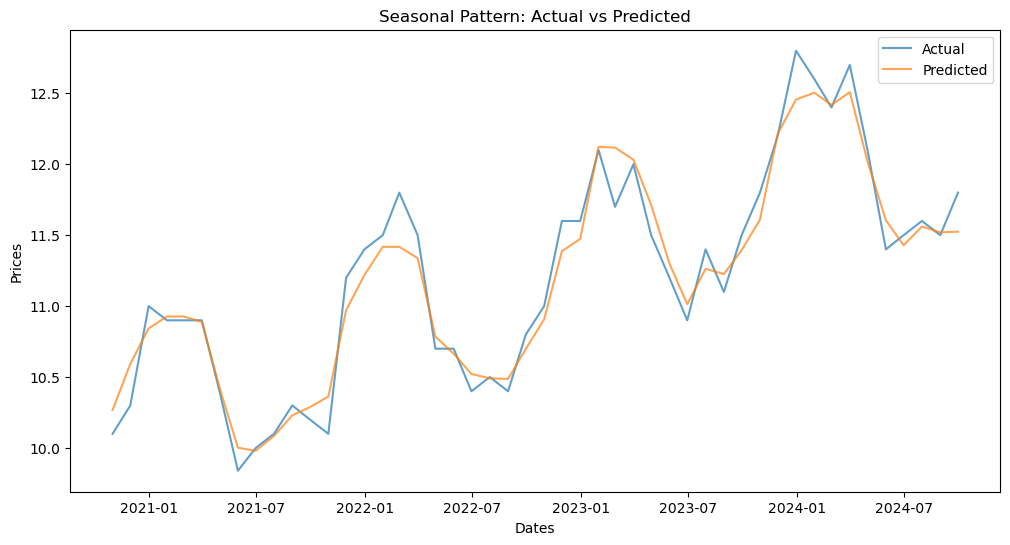

In [17]:
#Visualization
data['predicted'] = model.predict(X)  # Predictions on full dataset

plt.figure(figsize=(12, 6))
plt.plot(data[headers[0]], data[headers[1]], label='Actual', alpha=0.7)
plt.plot(data[headers[0]], data['predicted'], label='Predicted', alpha=0.7)
plt.title('Seasonal Pattern: Actual vs Predicted')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()
plt.show()

In [19]:
#Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.3f}")
print(f"R^2 Score: {r2:.3f}")

Mean Squared Error: 0.055
R^2 Score: 0.857


In [25]:
dates_input = input("Enter dates in YYYY-MM-DD format separated by commas: ")
date_in = pd.to_datetime(dates_input.split(","))
X_unseen = pd.DataFrame({'Dates': date_in})

#Feature Engineering
X_unseen['year'] = X_unseen['Dates'].dt.year
X_unseen['month'] = X_unseen['Dates'].dt.month
X_unseen['day'] = X_unseen['Dates'].dt.day
X_unseen['day_of_year'] = X_unseen['Dates'].dt.dayofyear


#Make predictions
X_new=X_unseen.iloc[:,1:3]
X_unseen['predicted'] = model.predict(X_new)  # Predictions on new dataset

print ('Price at ', dates_input,' is', X_unseen['predicted'].iloc[0])

Enter dates in YYYY-MM-DD format separated by commas:  05-10-2025


Price at  05-10-2025  is 11.605000000000004
